# Experiment 6
Let's take a look at a number of distributions in the full sample and correlations between them:
	- Separate views by:
		○ Full sample
		○ Split by diagnosis
		○ Split by site
		○ (split by cluster)
	- COIs
		○ FIQ, VIQ, PIQ
		○ ADOS
		○ SRS
		○ Motion
		○ Age
		○ Sex
	- Correlations
		○ IQ - [ADOS, SRS, Motion]
		○ Motion - [ADOS, SRS, Age, Sex, Site (in addition to split)]
		○ SRS - [Age, Sex, Site]

Answer a couple of questions with these overviews:
	1. Is there a bias of IQ, Motion or severity across sites?
Is motion correlated with our covariates of interest (severity, diagnosis, SRS?)

In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

In [2]:
%matplotlib inline

In [3]:
# Set up the paths
pheno_path = '/data1/abide/Pheno/full_merged_pheno.csv'

In [4]:
pheno = pd.read_csv(pheno_path)
pheno.head()

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,frames_scrubbed,frames_OK,FD,FD_scrubbed,ADOS_SOCOM_SEV,ADOS_STBEH_SEV
0,CALTECH,51456,1,4.0,55.4,1,R,NaN,126.0,118.0,...,NaN,2,NaN,NaN,95,55,0.434593,0.328121,6.0,6.0
1,CALTECH,51457,1,4.0,22.9,1,Ambi,NaN,107.0,119.0,...,NaN,2,NaN,NaN,16,134,0.207160,0.170893,4.0,5.0
2,CALTECH,51458,1,1.0,39.2,1,R,NaN,93.0,80.0,...,NaN,2,NaN,NaN,18,132,0.322805,0.288872,9.0,6.0
3,CALTECH,51459,1,1.0,22.8,1,R,NaN,106.0,94.0,...,NaN,2,NaN,NaN,0,150,0.152963,0.152963,6.0,1.0
4,CALTECH,51460,1,1.0,34.6,2,Ambi,NaN,133.0,135.0,...,NaN,2,NaN,NaN,0,150,0.207277,0.207277,7.0,5.0


In [5]:
pheno_re = pheno.replace({'DX_GROUP': {1: 'Autism', 2:'Control'}})

In [6]:
coi = ['SITE_ID', 'DX_GROUP', 'AGE_AT_SCAN', 'SEX',
       'frames_scrubbed ', 'frames_OK ', 'FD ', 'FD_scrubbed',
       'SRS_RAW_TOTAL', 'ADOS_SOCOM_SEV', 'ADOS_STBEH_SEV']

## IQ
Take a look at distributions of IQ

### Overall

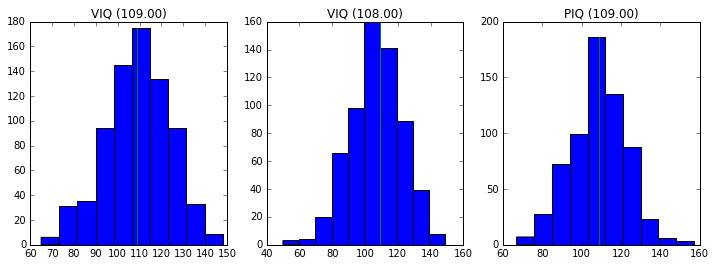

In [7]:
f = plt.figure(figsize=(12, 4))
#FIQ
ax_f = f.add_subplot(131)
x_f = pheno['FIQ'].values[pheno['FIQ'].notnull().values]
n, bins, patches = ax_f.hist(x_f)
tmp = ax_f.plot(np.tile(np.median(x_f),(2,1)), [0, np.max(n)], 'g')
tmp = ax_f.set_title('VIQ ({:.2f})'.format(np.median(x_f)))
#VIQ
ax_v = f.add_subplot(132)
x_p = pheno['VIQ'].values[pheno['VIQ'].notnull().values]
n, bins, patches = ax_v.hist(x_p)
tmp = ax_v.plot(np.tile(np.median(x_f),(2,1)), [0, np.max(n)], 'g')
tmp = ax_v.set_title('VIQ ({:.2f})'.format(np.median(x_p)))
#PIQ
ax_p = f.add_subplot(133)
x_p = pheno['PIQ'].values[pheno['PIQ'].notnull().values]
n, bins, patches = ax_p.hist(x_p)
tmp = ax_p.plot(np.tile(np.median(x_f),(2,1)), [0, np.max(n)], 'g')
tmp = ax_p.set_title('PIQ ({:.2f})'.format(np.median(x_f)))

Overall looks pretty normal. Median is shifted to 110, not sure how common that is. Let's look at the difference in IQ by diagnosis

### By Diagnosis

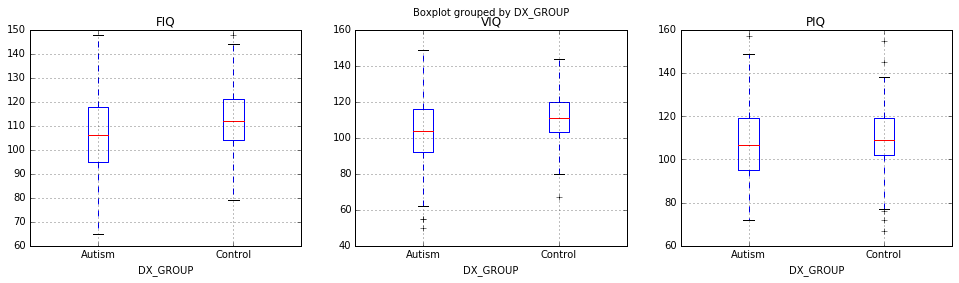

In [8]:
f = plt.figure(figsize=(16, 4))
#FIQ
ax_f = f.add_subplot(131)

#VIQ
ax_v = f.add_subplot(132)

#PIQ
ax_p = f.add_subplot(133)

pheno_re.boxplot('FIQ', by='DX_GROUP', ax=ax_f)
pheno_re.boxplot('VIQ', by='DX_GROUP', ax=ax_v)
pheno_re.boxplot('PIQ', by='DX_GROUP', ax=ax_p)

Ok, not too surprising either. A bit of a shift to the low end in the diagnostic population but nothing crazy. Let's look by site

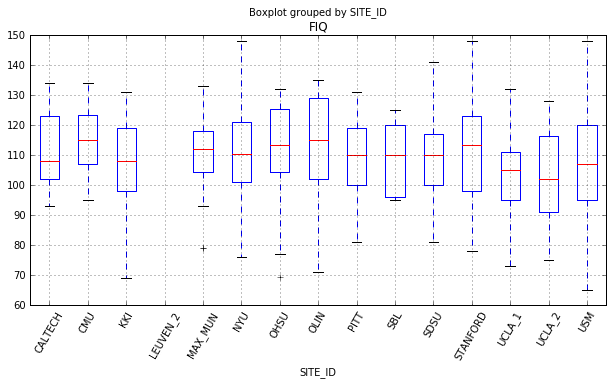

In [9]:
pheno_re.boxplot('FIQ', by='SITE_ID', figsize=(10,5), rot=60)

Ok, this looks reasonably similar. Let's do it just for the patients

### By site

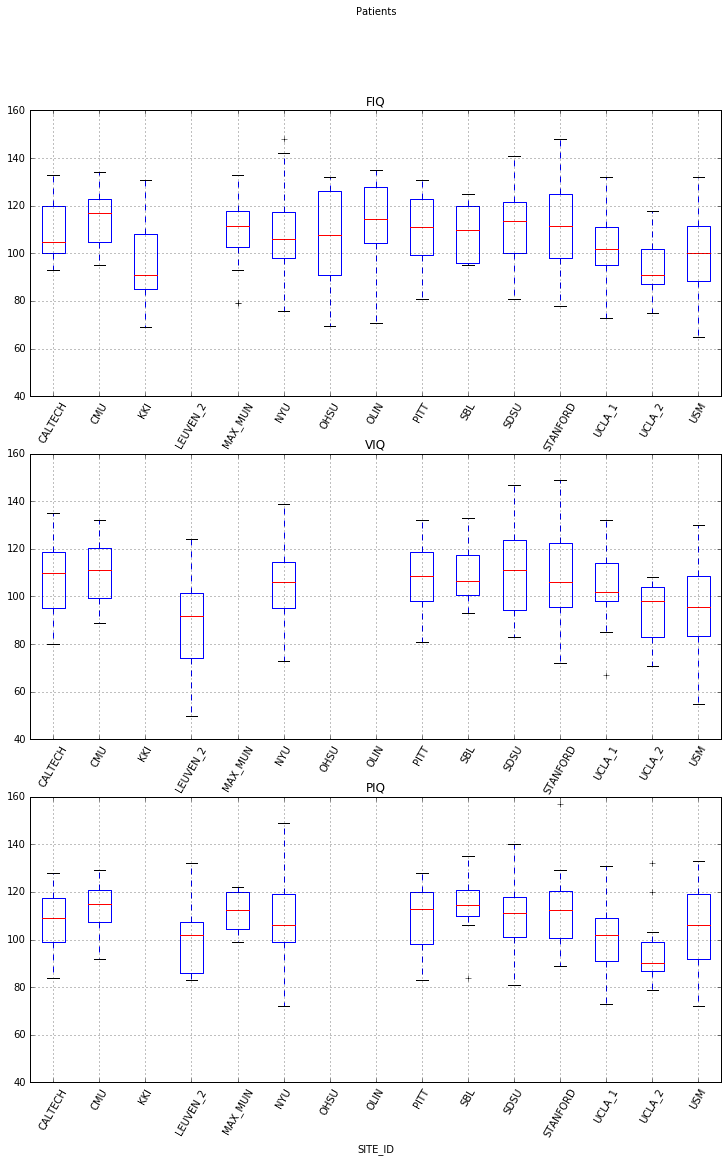

In [10]:
# FIQ, VIQ, PIQ for patients
f = plt.figure(figsize=(12, 18))
ax_f = f.add_subplot(311)
ax_v = f.add_subplot(312)
ax_p = f.add_subplot(313)

tmp = pheno_re[pheno['DX_GROUP']==1].boxplot('FIQ', by='SITE_ID', ax=ax_f, rot=60)
tmp = pheno_re[pheno['DX_GROUP']==1].boxplot('VIQ', by='SITE_ID', ax=ax_v, rot=60)
tmp = pheno_re[pheno['DX_GROUP']==1].boxplot('PIQ', by='SITE_ID', ax=ax_p, rot=60)

tmp = ax_f.set_ylim([40, 160])
tmp = ax_v.set_ylim([40, 160])
tmp = ax_p.set_ylim([40, 160])
tmp = f.suptitle('Patients')

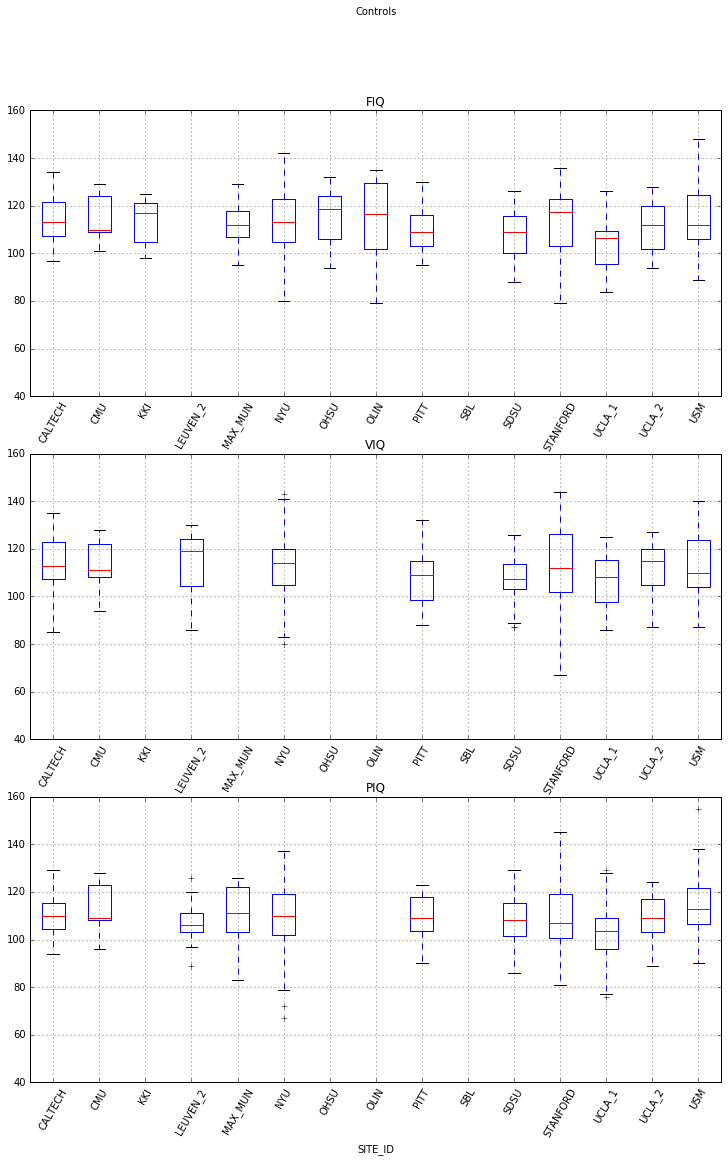

In [11]:
# FIQ, VIQ, PIQ for controls
f = plt.figure(figsize=(12, 18))
ax_f = f.add_subplot(311)
ax_v = f.add_subplot(312)
ax_p = f.add_subplot(313)

tmp = pheno_re[pheno['DX_GROUP']==2].boxplot('FIQ', by='SITE_ID', ax=ax_f, rot=60)
tmp = pheno_re[pheno['DX_GROUP']==2].boxplot('VIQ', by='SITE_ID', ax=ax_v, rot=60)
tmp = pheno_re[pheno['DX_GROUP']==2].boxplot('PIQ', by='SITE_ID', ax=ax_p, rot=60)

tmp = ax_f.set_ylim([40, 160])
tmp = ax_v.set_ylim([40, 160])
tmp = ax_p.set_ylim([40, 160])
tmp = f.suptitle('Controls')

Overall, the patient samples seem a lot more heterogeneous across sites compared to the control samples. So ^IQ should be considerably site dependent. And we need to control for that if that's something we look at.

On the other hand, it is also clear that the patient sample is of high functioning ASD patients. There is not one patient who would be considered intellectually disabled (<70) and several of them are in the high 140s for full IQ.

For verbal IQ, there is a stronger difference between the two groups as can be expected and is also visible in the 

### Correlation
Let's take a look at how correlated this IQ stuff is with the other variables (ADOS, SRS and motion)

In [12]:
def make_fig(pheno, x_var, y_var, ax, xlim=None):
    form = "{} ~ {}".format(y_var, x_var)
    res = smf.rlm(formula=form, data=pheno).fit()
    x_new = [np.min(pheno[x_var])-1, np.max(pheno[x_var])+1]
    y_new = np.polyval(res.params.values[::-1], x_new)
    
    a = ax.plot(pheno[x_var], pheno[y_var], '.r')
    b = ax.plot(x_new, y_new, '-b')
    tmp = a+b
    ax.legend(b, ('rlm {:.4f} (p={:.4f})'.format(res.params[1], res.pvalues[1]),))
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    if xlim:
        ax.set_xlim(xlim)
    
    return ax

#### Motion

In [13]:
coi

['SITE_ID',
 'DX_GROUP',
 'AGE_AT_SCAN',
 'SEX',
 'frames_scrubbed ',
 'frames_OK ',
 'FD ',
 'FD_scrubbed',
 'SRS_RAW_TOTAL',
 'ADOS_SOCOM_SEV',
 'ADOS_STBEH_SEV']

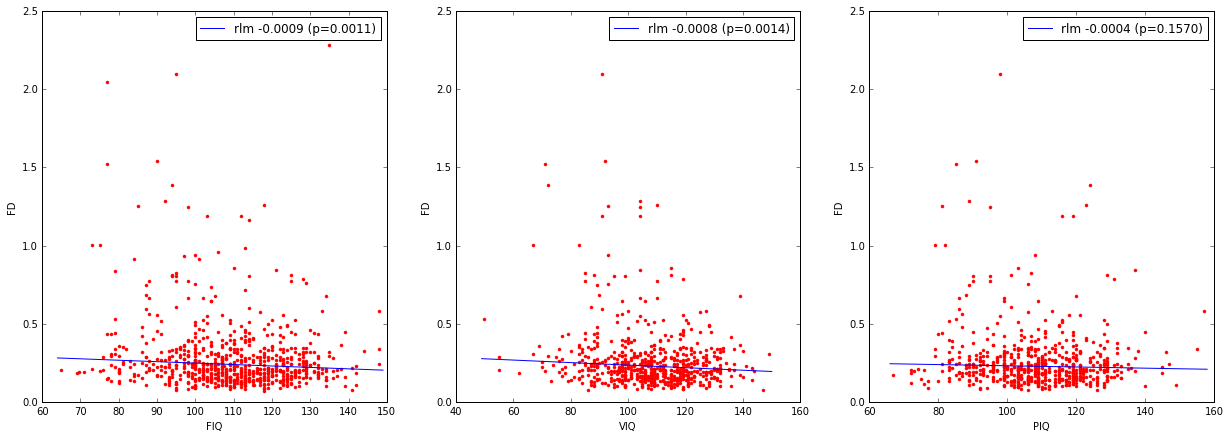

In [14]:
f = plt.figure(figsize=(21,7))
ax1 = f.add_subplot(131)
tmp = make_fig(pheno, 'FIQ', 'FD', ax1)

ax2 = f.add_subplot(132)
tmp = make_fig(pheno, 'VIQ', 'FD', ax2)

ax3 = f.add_subplot(133)
tmp = make_fig(pheno, 'PIQ', 'FD', ax3)

#### ADOS

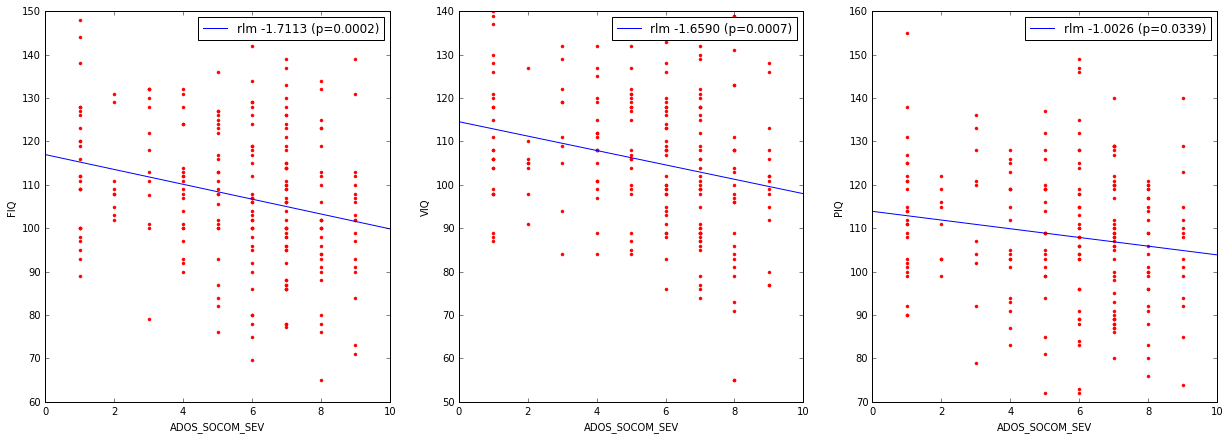

In [15]:
f = plt.figure(figsize=(21,7))
ax1 = f.add_subplot(131)
tmp = make_fig(pheno, 'ADOS_SOCOM_SEV', 'FIQ', ax1)

ax2 = f.add_subplot(132)
tmp = make_fig(pheno, 'ADOS_SOCOM_SEV', 'VIQ', ax2)

ax3 = f.add_subplot(133)
tmp = make_fig(pheno, 'ADOS_SOCOM_SEV', 'PIQ', ax3)

### SRS

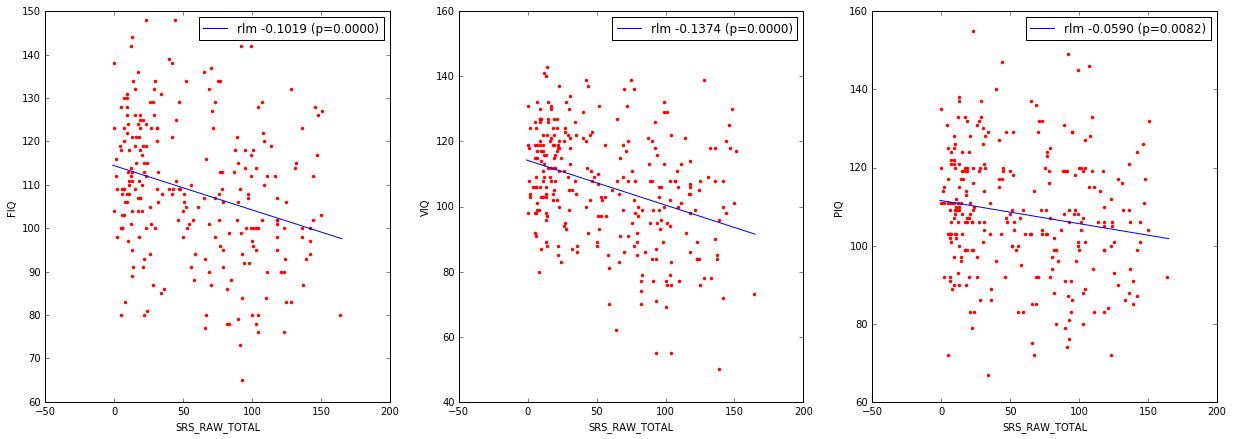

In [16]:
f = plt.figure(figsize=(21,7))
ax1 = f.add_subplot(131)
tmp = make_fig(pheno, 'SRS_RAW_TOTAL', 'FIQ', ax1)

ax2 = f.add_subplot(132)
tmp = make_fig(pheno, 'SRS_RAW_TOTAL', 'VIQ', ax2)

ax3 = f.add_subplot(133)
tmp = make_fig(pheno, 'SRS_RAW_TOTAL', 'PIQ', ax3)

## Motion
Let's look at Motion

In [18]:
pheno.columns

Index(['SITE_ID', 'SUB_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN', 'SEX',
       'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ', 'VIQ', 'PIQ',
       'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE',
       'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C',
       'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE',
       'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV',
       'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB',
       'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION',
       'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION',
       'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL',
       'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME',
       'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED',
       'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED',
       'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED',
       'VINELAND_DOMESTIC_

In [17]:
coi

['SITE_ID',
 'DX_GROUP',
 'AGE_AT_SCAN',
 'SEX',
 'frames_scrubbed ',
 'frames_OK ',
 'FD ',
 'FD_scrubbed',
 'SRS_RAW_TOTAL',
 'ADOS_SOCOM_SEV',
 'ADOS_STBEH_SEV']

### Overall

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f331f271ac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f331e68e780>], dtype=object)

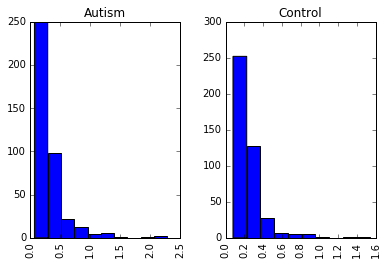

In [34]:
a = pheno_re['FD']
b = 
plt.hist

### Diagnosis

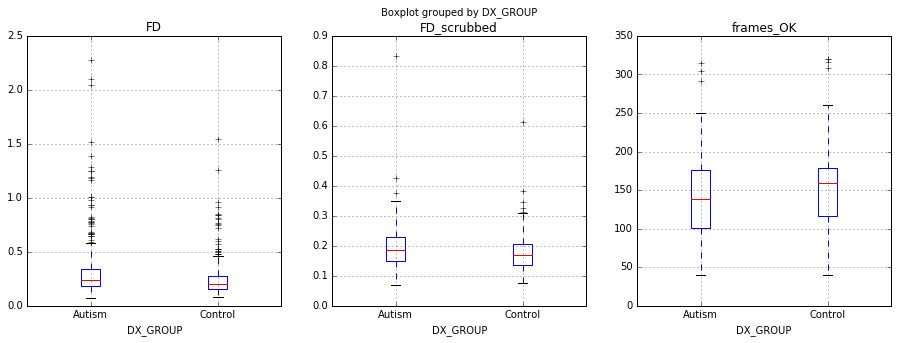

In [24]:
f = plt.figure(figsize=(15, 5))
ax_f = f.add_subplot(131)
ax_v = f.add_subplot(132)
ax_p = f.add_subplot(133)

pheno_re.boxplot('FD', by='DX_GROUP', ax=ax_f)
pheno_re.boxplot('FD_scrubbed', by='DX_GROUP', ax=ax_v)
pheno_re.boxplot('frames_OK', by='DX_GROUP', ax=ax_p)

### Site

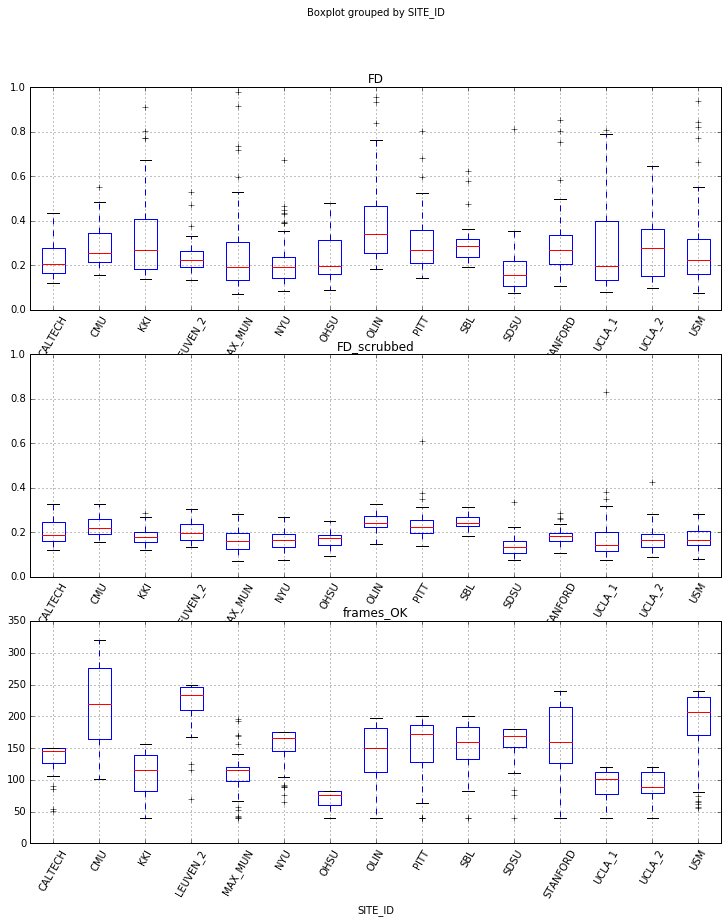

In [33]:
f = plt.figure(figsize=(12, 14))
ax_f = f.add_subplot(311)
ax_v = f.add_subplot(312)
ax_p = f.add_subplot(313)

pheno_re.boxplot('FD', by='SITE_ID', ax=ax_f, rot=60)
ax_f.set_ylim([0,1])
pheno_re.boxplot('FD_scrubbed', by='SITE_ID', ax=ax_v, rot=60)
ax_v.set_ylim([0,1])
pheno_re.boxplot('frames_OK', by='SITE_ID', ax=ax_p, rot=60)